In [12]:
import os
import numpy as np
from numpy import array, nan
from numpy.ma import masked_invalid, getmask
from importlib import reload

from matplotlib import pyplot as plt

import qcodes as qc
from qcodes.instrument.parameter import Parameter, ManualParameter, StandardParameter

import silq

loc_provider = qc.data.location.FormatLocation(fmt='data/{date}/#{counter}_{name}_{time}')
qc.data.data_set.DataSet.location_provider=loc_provider
qc.show_subprocess_widget()

%matplotlib notebook

# Test

In [19]:
arr = \
array([[  1.,   2.,   3.,   4.,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan]])

In [8]:
arr_pad = np.pad(arr, [(1, 1), (1, 1)], mode='symmetric')
arr_pad[:, 0] += np.nan_to_num(arr_pad[:, 1] - arr_pad[:, 2])
arr_pad[:, -1] += arr_pad[:, -2] - arr_pad[:, -3]
arr_pad[0] += np.nan_to_num(arr_pad[1] - arr_pad[2])
arr_pad[-1] += arr_pad[-2] - arr_pad[-3]

arr_pad = arr_pad[:,:-1] + np.nan_to_num(np.diff(arr_pad)/2)
arr_pad = arr_pad[:-1, :] + np.nan_to_num(np.diff(arr_pad, axis=0) / 2)
arr_pad

array([[ 0.5,  1.5,  2.5,  3.5,  4. ,  nan],
       [ 0.5,  1.5,  2.5,  3.5,  4. ,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan]])

In [15]:
np.nan_to_num(arr_pad[2])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.])

# Custom plot

In [21]:
z.shape

(4, 5)

In [60]:
x = masked_invalid([0,1,2,3,nan])
x = np.full((4,5), x)
y = masked_invalid([0,nan,nan,nan])

In [63]:
arr

array([[  1.,   2.,   3.,   4.,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan]])

<IPython.core.display.Javascript object>


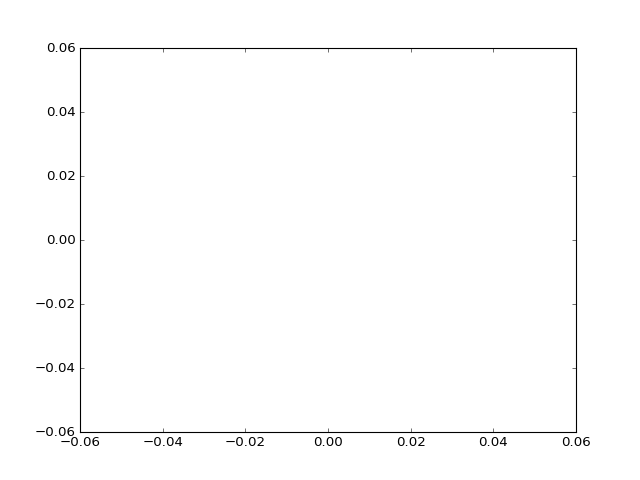

In [62]:

z = masked_invalid(arr)
plt.figure()
plt.pcolormesh(arr,y,z)

# Plot

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = 'data/2016-09-19/#043_{name}_15-38-22'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dummy_set   | dummy_set    | (5,)
   Setpoint | dummy_set_0 | dummy_set    | (5, 5)
   Measured | dummy_get   | dummy_get    | (5, 5)
started at 2016-09-19 15:38:22


<IPython.core.display.Javascript object>


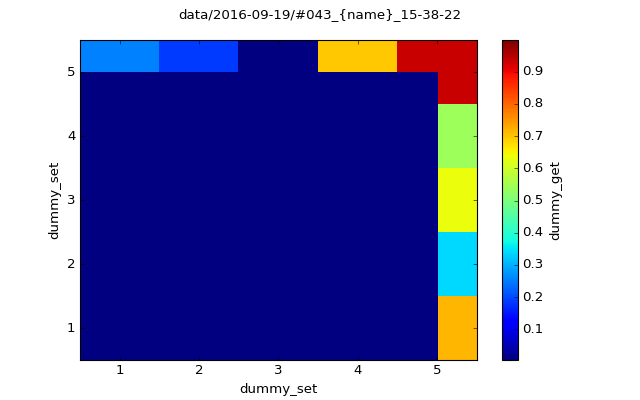

DataArray[5,5]: dummy_set_0
array([[  1.,   2.,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan]])
[[ 0.5  1.5  2.   nan  nan  nan]
 [ 0.5  1.5  2.   nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]]
DataArray[5]: dummy_set
array([  1.,  nan,  nan,  nan,  nan])
[-- -- -- -- -- --]


C:\Anaconda3\lib\site-packages\numpy\ma\core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Anaconda3\lib\site-packages\numpy\ma\core.py:812: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


DataArray[5,5]: dummy_set_0
array([[  1.,   2.,   3.,   4.,   5.],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan]])
[[ 0.5  1.5  2.5  3.5  4.5  5.5]
 [ 0.5  1.5  2.5  3.5  4.5  5.5]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]]
DataArray[5]: dummy_set
array([  1.,  nan,  nan,  nan,  nan])
[-- -- -- -- -- --]
DataArray[5,5]: dummy_set_0
array([[  1.,   2.,   3.,   4.,   5.],
       [  1.,   2.,   3.,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan]])
[[ 0.5   1.5   2.5   3.5   4.5   5.5 ]
 [ 0.5   1.5   2.5   3.25  4.5   5.5 ]
 [ 0.5   1.5   2.5   3.     nan   nan]
 [  nan   nan   nan   nan   nan   nan]
 [  nan   nan   nan   nan   nan   nan]
 [  nan   nan   nan   nan   nan   nan]]
DataArray[5]: dummy_set
array([  1.,

In [3]:
reload(qc)

dummy_get = StandardParameter(name='dummy_get',
                              get_cmd=np.random.rand)
dummy_set = ManualParameter(name='dummy_set',
                            initial_value=42)

data = qc.Loop(dummy_set[1:6:1]
              ).loop(dummy_set[1:6:1], delay=0.33
                    ).each(dummy_get).run()#background=False)

plot = qc.MatPlot(data.dummy_get)

# Old

In [5]:
m1 = np.array([0, 1, np.nan, 4, 5])
m2 = np.array([0, 1, 2, 4, 5])

m1_mask = np.ma.masked_invalid(m1)
m2_mask = np.ma.masked_invalid(m2)

np.insert(m2_mask,[2,3],[11,12])

m3=np.append(m2,[2,3])

np.ma.is_mask(m1_mask)

False

In [3]:
x=np.array([[2.59, 2.5914, 2.5928, 2.5942, 2.5956, 2.597]
, [2.59, 2.5914, 2.5928, 2.5942, 2.5956, 2.597]
, [2.59, 2.5914, 2.5928, 2.5942, 2.5956, 2.597]
, [2.59, 2.5914, 2.5928, 2.5942, 2.5956, 2.597]])

<IPython.core.display.Javascript object>


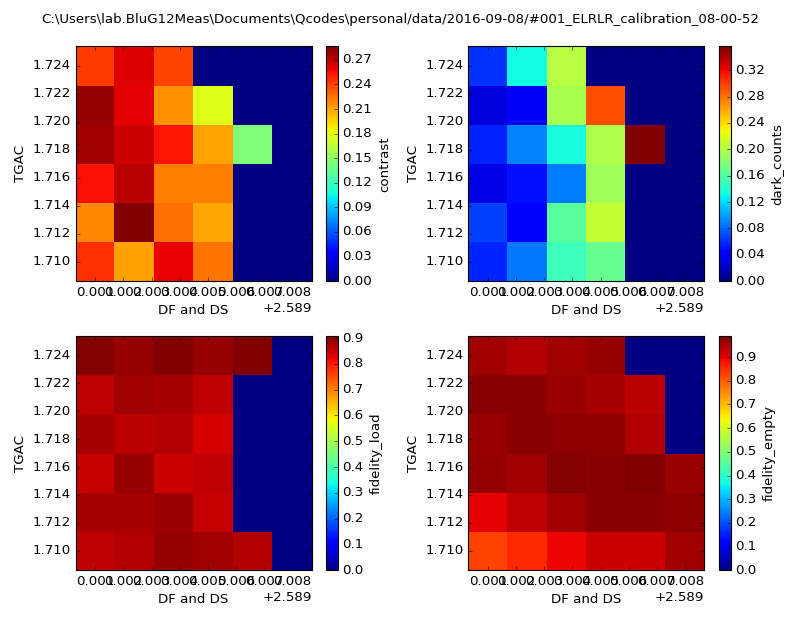

In [2]:
data = qc.load_data(base_dir+'/data/2016-09-08/#001_ELRLR_calibration_08-00-52')

plotQ = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plotQ.add(data.contrast, subplot=0)
plotQ.add(data.dark_counts, subplot=1)
plotQ.add(data.fidelity_load, subplot=2)
plotQ.add(data.fidelity_empty, subplot=3)
plotQ.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [12]:
arr = x

arr_pad = np.pad(arr, [(1,1),(1,1)], mode='symmetric')
arr_pad[:,0] += arr_pad[:,1] - arr_pad[:,2]
arr_pad[:,-1] += arr_pad[:,-2] - arr_pad[:,-3]
arr_pad[0] += arr_pad[1] - arr_pad[2]
arr_pad[-1] += arr_pad[-2] - arr_pad[-3]
print(arr_pad)

[[ 2.5886  2.59    2.5914  2.5928  2.5942  2.5956  2.597   2.5984]
 [ 2.5886  2.59    2.5914  2.5928  2.5942  2.5956  2.597   2.5984]
 [ 2.5886  2.59    2.5914  2.5928  2.5942  2.5956  2.597   2.5984]
 [ 2.5886  2.59    2.5914  2.5928  2.5942  2.5956  2.597   2.5984]
 [ 2.5886  2.59    2.5914  2.5928  2.5942  2.5956  2.597   2.5984]
 [ 2.5886  2.59    2.5914  2.5928  2.5942  2.5956  2.597   2.5984]]


In [13]:
arr_pad = arr_pad[:,:-1] + np.diff(arr_pad)/2
arr_pad

array([[ 2.5893,  2.5907,  2.5921,  2.5935,  2.5949,  2.5963,  2.5977],
       [ 2.5893,  2.5907,  2.5921,  2.5935,  2.5949,  2.5963,  2.5977],
       [ 2.5893,  2.5907,  2.5921,  2.5935,  2.5949,  2.5963,  2.5977],
       [ 2.5893,  2.5907,  2.5921,  2.5935,  2.5949,  2.5963,  2.5977],
       [ 2.5893,  2.5907,  2.5921,  2.5935,  2.5949,  2.5963,  2.5977],
       [ 2.5893,  2.5907,  2.5921,  2.5935,  2.5949,  2.5963,  2.5977]])

In [17]:
arr_pad = arr_pad[:-1,:] + np.diff(arr_pad,axis=0)/2
arr_pad

array([[ 2.5893,  2.5907,  2.5921,  2.5935,  2.5949,  2.5963,  2.5977],
       [ 2.5893,  2.5907,  2.5921,  2.5935,  2.5949,  2.5963,  2.5977],
       [ 2.5893,  2.5907,  2.5921,  2.5935,  2.5949,  2.5963,  2.5977],
       [ 2.5893,  2.5907,  2.5921,  2.5935,  2.5949,  2.5963,  2.5977],
       [ 2.5893,  2.5907,  2.5921,  2.5935,  2.5949,  2.5963,  2.5977]])